


#  K Nearest Neighbors and Normalization

##Sagar Bhandari
## Sept.16, 2025





In [ ]:
import pandas as pd
import numpy as np


from google.colab import drive
drive.mount('/content/drive')

vehicles_df = pd.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')



Mounted at /content/drive


/tmp/ipython-input-2541560323.py:8: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_df = pd.read_csv('/content/drive/MyDrive/CS167/datasets/vehicles.csv')


In [ ]:
vehicles_df.head()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0




```
Here, I am going to write a function that can make k-Nearest-Neighbor
predictions for the combined fuel efficiency ("comb08" column) based
on three predictor columns: the year, the number of engine cylinders,
 and the engine displacement in liters ("year", "cylinders", and "displ"
 columns).
 ```





```
As per question we will work on  the cars with "Regular" listed in the "fuelType" column.

For this, we can start making new subset with advised columns.
```



In [ ]:
df = vehicles_df[vehicles_df["fuelType"] == "Regular"][["year","cylinders","displ","comb08"]]
#df.head()


#I selected value with  fuelType == Regular and then selected a subset of columns  "year","cylinders","displ","comb08" and we will be working on this new dataframe.

,year,cylinders,displ,comb08
0,1985,4.0,2.0,21
1,1985,12.0,4.9,11
2,1985,4.0,2.2,27
3,1985,8.0,5.2,11
5,1993,4.0,1.8,22


In [ ]:
print(df.isna().sum())
# this will  chheck if there is any NaN entry  and if yes,  it will add   them (sum ), giving answer how many NaN we have in each column.


year         0
cylinders    3
displ        2
comb08       0
dtype: int64




```
I can see there are only 3 NaN and 2 NaN in cylinders and displ respectively.
Since this is very few number in list if thousands,
I will drop them and it should not alter my result.
```



In [ ]:
df = df.dropna()
print(df.isna().sum())
#Now our dataset is free of na

year         0
cylinders    0
displ        0
comb08       0
dtype: int64


In [ ]:
#means and std
#year
year_mean = df['year'].mean()
year_std = df['year'].std()

#Cylinder
cyl_mean = df['cylinders'].mean()
cyl_std = df['cylinders'].std()

#displ
displ_mean = df['displ'].mean()
displ_std = df['displ'].std()

# making  a normalized copy
normalized_df = df.copy()

normalized_df['year'] = (df['year'] - year_mean) / year_std
normalized_df['cylinders'] = (df['cylinders'] - cyl_mean) / cyl_std
normalized_df['displ'] = (df['displ'] - displ_mean) / displ_std


In [ ]:
def kNN(specimen, data, k):
    #  1. calculating simple euclidean  distance
    data['distance_to_new'] = np.sqrt(
        (specimen['year'] - data['year'])**2 +
        (specimen['cylinders'] - data['cylinders'])**2 +
        (specimen['displ'] - data['displ'])**2
    )

    # 2. sort
    sorted_data = data.sort_values(['distance_to_new'])

    # 3. as we have mpg a numeric data unlike in species in iris i will be using mean.
    #this way i will end up getting numeric answer
    prediction = sorted_data.iloc[0:k]['comb08'].mean()

    return prediction

In [ ]:
# lets give a test

#stats for new car
new_carA = {
    'year': 2017,
    'cylinders': 6,
    'displ': 3.5
}

# predict mpg with k=5
print("Predicted mpg for new car is:" ,kNN(new_car, df.copy(), 5))

# yes , you can specify your own k here.

Predicted mpg for new car is: 21.8


In [ ]:
#lets try with some more dummy car data

car1 = {"year": 2025, "cylinders": 4, "displ": 2.0}
car2 = {"year": 2005, "cylinders": 6, "displ": 3.5}
car3 = {"year": 2020, "cylinders": 8, "displ": 5.0}


k = 9


print("MPG of Car 1 prediction (2025, 4 cyl, 2.0):", kNN(car1, df, k))
print("MPG of Car 2 prediction (2005, 6 cyl, 3.5):", kNN(car2, df, k))
print("MPG of Car 3 prediction (2020, 8 cyl, 5.0):", kNN(car3, df, k))

MPG of Car 1 prediction (2025, 4 cyl, 2.0): 27.77777777777778
MPG of Car 2 prediction (2005, 6 cyl, 3.5): 18.11111111111111
MPG of Car 3 prediction (2020, 8 cyl, 5.0): 17.77777777777778


In [ ]:
cols_to_normalize = ['year', 'cylinders', 'displ']  # we need to normalize this columns
means = {col: df[col].mean() for col in cols_to_normalize}
stds  = {col: df[col].std() for col in cols_to_normalize}



In [ ]:
#for training data set lets start by creting normalised
normalized_df = df.copy()
for col in cols_to_normalize:
    normalized_df[col] = (df[col] - means[col]) / stds[col]

def normalize_specimen(specimen, means, stds):
    return {col: (specimen[col] - means[col]) / stds[col] for col in specimen}

In [ ]:
def kNN_normalized(specimen, data, k):
    data = data.copy()
    # Now we compute distance but  in normalized form
    data['distance_to_new'] = np.sqrt(
        (specimen['year'] - data['year'])**2 +
        (specimen['cylinders'] - data['cylinders'])**2 +
        (specimen['displ'] - data['displ'])**2
    )
    # Sort and predicting result
    sorted_data = data.sort_values('distance_to_new')
    prediction = sorted_data.iloc[0:k]['comb08'].mean()
    return prediction



```
Time to test normalised kNN ```



In [ ]:
car1 = {"year": 2015, "cylinders": 4, "displ": 2.0}
car2 = {"year": 2005, "cylinders": 6, "displ": 3.5}
car3 = {"year": 2020, "cylinders": 8, "displ": 5.0}

k = 5

# Normalize the cars
car1_norm = normalize_specimen(car1, means, stds)
car2_norm = normalize_specimen(car2, means, stds)
car3_norm = normalize_specimen(car3, means, stds)

In [ ]:
# print them out

print("Normalized kNN MPG:")
print("Car1:", kNN_normalized(car1_norm, normalized_df, k))
print("Car2:", kNN_normalized(car2_norm, normalized_df, k))
print("Car3:", kNN_normalized(car3_norm, normalized_df, k))

Normalized kNN MPG:
Car1: 24.8
Car2: 21.4
Car3: 18.0


In [ ]:
# lets compare mpg using both Normalised and not normalised traing data .
# i will make 10 more dummy car details

cars = {
    "car101": {"year": 2010, "cylinders": 4, "displ": 2.0},
    "car102": {"year": 2015, "cylinders": 6, "displ": 3.0},
    "car103": {"year": 2020, "cylinders": 8, "displ": 5.0},
    "car104": {"year": 2000, "cylinders": 4, "displ": 1.8},
    "car105": {"year": 2005, "cylinders": 6, "displ": 3.5},
    "car106": {"year": 2018, "cylinders": 4, "displ": 2.2},
    "car107": {"year": 2012, "cylinders": 6, "displ": 3.0},
    "car108": {"year": 2021, "cylinders": 8, "displ": 4.5},
    "car109": {"year": 2008, "cylinders": 4, "displ": 2.5},
    "car110": {"year": 2016, "cylinders": 6, "displ": 3.2}
}

k = 8


# Not normalised  kNN predictions

print("Not Normalised kNN MPG predictions:")
for car_name, car_data in cars.items():
    mpg = kNN(car_data, df, k)
    print(f"{car_name}: {mpg:.2f} MPG")


# Normalize the cars for normalized kNN

cars_norm = {name: normalize_specimen(data, means, stds) for name, data in cars.items()}




# Normalized kNN predictions

print("\nNormalized kNN MPG predictions:")
for car_name, car_data in cars_norm.items():
    mpg = kNN_normalized(car_data, normalized_df, k)
    print(f"{car_name}: {mpg:.2f} MPG")
#.  i added .2f for decimal upto 2 floats ,

Not Normalised kNN MPG predictions:
car101: 25.38 MPG
car102: 21.12 MPG
car103: 17.75 MPG
car104: 26.00 MPG
car105: 18.00 MPG
car106: 22.50 MPG
car107: 19.62 MPG
car108: 18.38 MPG
car109: 25.12 MPG
car110: 21.38 MPG

Normalized kNN MPG predictions:
car101: 25.25 MPG
car102: 21.12 MPG
car103: 18.12 MPG
car104: 25.75 MPG
car105: 21.12 MPG
car106: 22.50 MPG
car107: 19.75 MPG
car108: 16.62 MPG
car109: 22.00 MPG
car110: 21.25 MPG




```
For Not Normalised , the values of element elemnt are going to have different
 ranges. For ex. if we have annual salary like $100,000 and age like 20 ,
  salary will overpower as it has significantly large number and we are trying to calculate distance.

For Normalised, we will bring them to same scale using z-scores.
This way they get a fair say in calculating.


As we can see our results above ,
Normalized kNN usually gives more balanced results because
it does not let one feature dominate the others.

```





```
QUESTION:
If I take a car from 2040 with only 2 cylinders and a tiny 1.2L engine and
send  it onto the roads of 1980, what would kNN predict for its MPG based on
 past cars?"   YES! Time travelling
```





```
To answer this question, I created 5 futuristic cars with cool features for
 the years 2030 - 2045. Then I ran both not normalised  kNN and normalised kNN
 predictions using my training data of older cars.
 ```



In [ ]:

# Lets predict mpg for 5 Futuristic Cars

futuristic_cars = {
    "car201": {"year": 2030, "cylinders": 2, "displ": 1.0},
    "car202": {"year": 2035, "cylinders": 3, "displ": 1.5},
    "car203": {"year": 2040, "cylinders": 4, "displ": 1.2},
    "car204": {"year": 2032, "cylinders": 4, "displ": 2.0},
    "car205": {"year": 2045, "cylinders": 1, "displ": 0.51}
}

k = 4

#Not Normalised  kNN Predictions
print("Not Normalised kNN MPG predictions for futuristic cars:")
for car_name, car_data in futuristic_cars.items():
    mpg = kNN(car_data, df, k)
    print(f"{car_name}: {mpg:.2f} MPG")



# Normalized kNN Predictions

print("\nNormalized kNN MPG predictions for futuristic cars:")
for car_name, car_data in futuristic_cars.items():
    car_norm = normalize_specimen(car_data, means, stds)
    mpg = kNN(car_norm, normalized_df, k)
    print(f"{car_name}: {mpg:.2f} MPG")


Not Normalised kNN MPG predictions for futuristic cars:
car201: 28.75 MPG
car202: 29.25 MPG
car203: 28.25 MPG
car204: 27.00 MPG
car205: 28.75 MPG

Normalized kNN MPG predictions for futuristic cars:
car201: 34.50 MPG
car202: 29.25 MPG
car203: 26.50 MPG
car204: 28.00 MPG
car205: 32.00 MPG


#Additionally




```
I can try to make graph , average MPG for each cylinder count, I can plot number of cylinder on x-axis and average mpg on y axis .

```



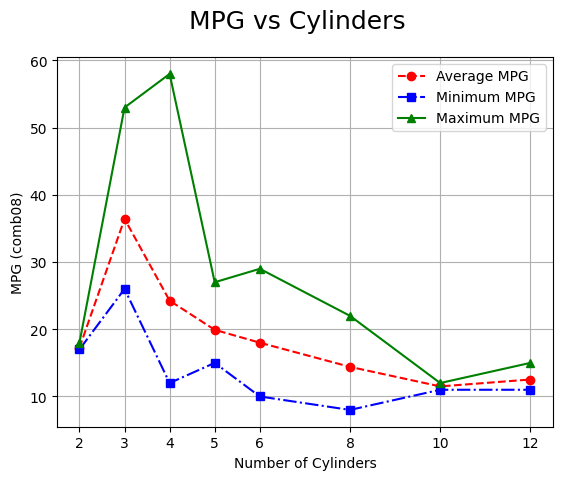

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# grouping cylinder by type i.e. numbers , i am using group by unique , this will include all kinds
# next calculate avg of group of cylinders


cyl_groups = sorted(df['cylinders'].unique())
avg_mpg = [df[df['cylinders'] == cyl]['comb08'].mean() for cyl in cyl_groups]

# max and min values.


min_mpg = [df[df['cylinders'] == cyl]['comb08'].min() for cyl in cyl_groups]
max_mpg = [df[df['cylinders'] == cyl]['comb08'].max() for cyl in cyl_groups]

# Plotting

plt.suptitle('MPG vs Cylinders', fontsize=18)
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG (comb08)')

# ploting out  average, min, and max MPG as 3 series
plt.plot(cyl_groups, avg_mpg, 'ro--', label='Average MPG')
plt.plot(cyl_groups, min_mpg, 'bs-.', label='Minimum MPG')
plt.plot(cyl_groups, max_mpg, 'g^-', label='Maximum MPG')

plt.xticks(cyl_groups)  # mto show numbers of cylinder
plt.legend()
plt.grid(True)
plt.show()




```
Refrence :    https://www.datacamp.com/cheat-sheet/matplotlib-cheat-sheet-plotting-in-python
```

